2023-1-60-075



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


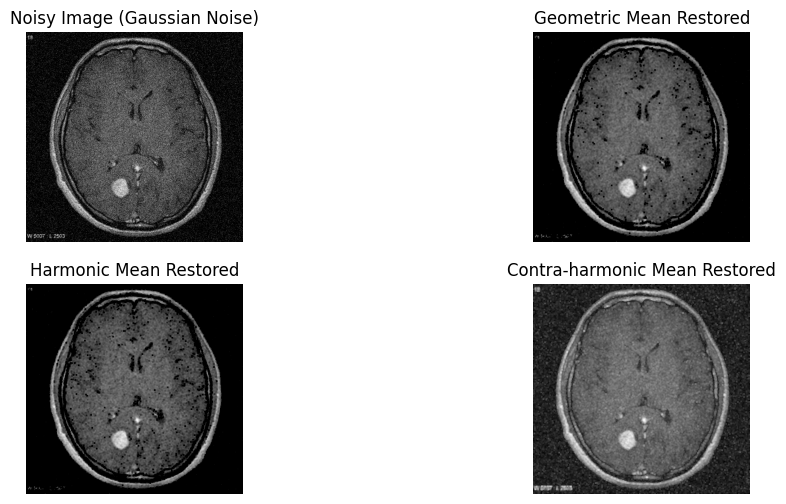

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter


# 1. Load image

img = cv2.imread("/content/drive/MyDrive/CSE 438/Picture1.png")  # upload file to Colab first
if img is None:
    raise FileNotFoundError("Picture1.jpg not found! Upload it to Colab.")
# convert to grayscale if color
if img.ndim == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# convert to float [0,1]
img = img.astype(np.float64) / 255.0


# 2. Add Gaussian noise

mean, var = 0, 0.01
noise = np.random.normal(mean, np.sqrt(var), img.shape)
noisy_img = np.clip(img + noise, 0, 1)


# 3. Define filters

def geometric_mean_filter(x):
    x = np.maximum(x, 1e-12)  # avoid log(0)
    return np.exp(np.mean(np.log(x)))

def harmonic_mean_filter(x):
    x = np.maximum(x, 1e-12)
    return len(x) / np.sum(1.0 / x)

def contra_harmonic_mean_filter(x, Q=1.5):
    x = np.maximum(x, 1e-12)
    num = np.sum(x ** (Q + 1))
    den = np.sum(x ** Q)
    return num / (den + 1e-12)


# 4. Apply filters

geo_restored = generic_filter(noisy_img, geometric_mean_filter, size=3, mode='reflect')
harmonic_restored = generic_filter(noisy_img, harmonic_mean_filter, size=3, mode='reflect')
contra_harmonic_restored = generic_filter(noisy_img, contra_harmonic_mean_filter, size=3, mode='reflect')


# 5. Display results

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(geo_restored, cmap='gray')
plt.title("Geometric Mean Restored")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(harmonic_restored, cmap='gray')
plt.title("Harmonic Mean Restored")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(contra_harmonic_restored, cmap='gray')
plt.title("Contra-harmonic Mean Restored")
plt.axis('off')

plt.show()


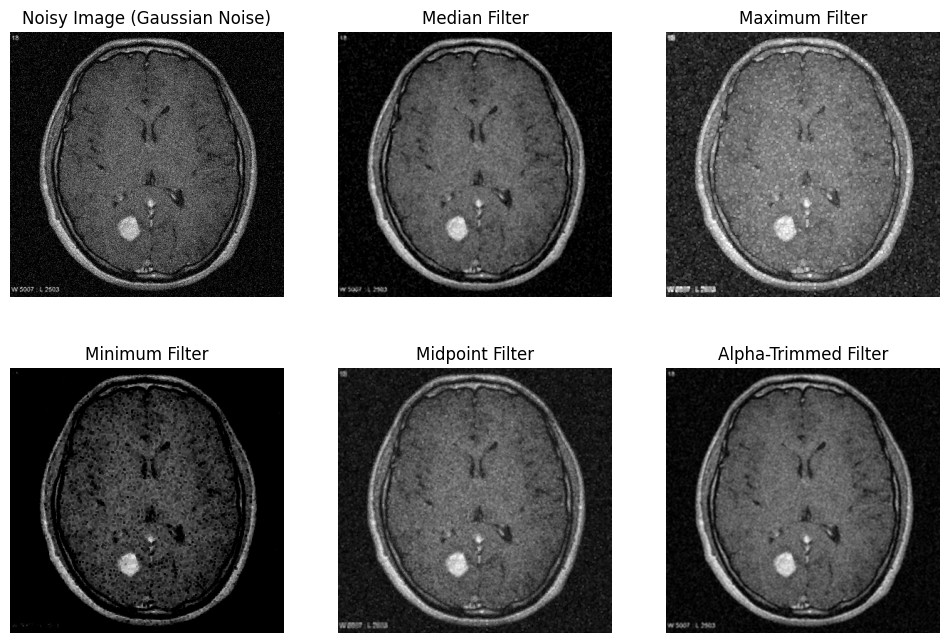

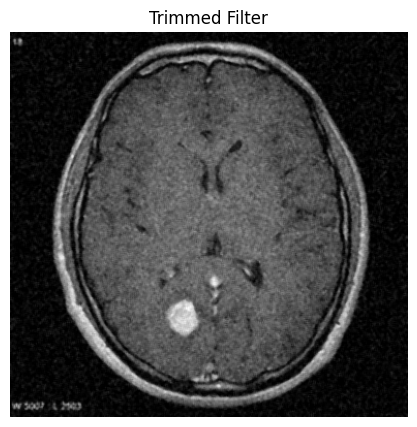

<Figure size 640x480 with 0 Axes>

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, maximum_filter, minimum_filter, generic_filter


img = cv2.imread("/content/drive/MyDrive/CSE 438/Picture1.png")  # Upload "Picture1.jpg" to Colab first
if img is None:
    raise FileNotFoundError("Picture1.jpg not found! Upload it to Colab.")
if img.ndim == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float [0,1]
img = img.astype(np.float64) / 255.0


mean, var = 0, 0.01
noise = np.random.normal(mean, np.sqrt(var), img.shape)
noisy_img = np.clip(img + noise, 0, 1)


# Median Filter
median_filtered = median_filter(noisy_img, size=3)

# Maximum Filter
max_filtered = maximum_filter(noisy_img, size=3)

# Minimum Filter
min_filtered = minimum_filter(noisy_img, size=3)

# Midpoint Filter
midpoint_filtered = (max_filtered + min_filtered) / 2

# Alpha-Trimmed Mean Filter
def alpha_trimmed_filter(x, d=2):
    # Sort the window
    sorted_x = np.sort(x)
    trimmed = sorted_x[d//2 : len(sorted_x) - d//2]  # remove d/2 lowest and highest
    return np.mean(trimmed)

alpha_trimmed_filtered = generic_filter(noisy_img, alpha_trimmed_filter, size=3, mode='reflect')

def trimmed_filter(x, trim_fraction=0.25):
    sorted_x = np.sort(x)
    n = len(sorted_x)
    trim = int(np.floor(trim_fraction * n))   # remove 25% lowest & highest
    trimmed = sorted_x[trim:n-trim] if trim < n/2 else sorted_x
    return np.mean(trimmed)

trimmed_filtered = generic_filter(noisy_img, trimmed_filter, size=3, mode='reflect')


plt.figure(figsize=(12, 8))

plt.subplot(2,3,1)
plt.imshow(noisy_img, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(max_filtered, cmap='gray')
plt.title("Maximum Filter")
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(min_filtered, cmap='gray')
plt.title("Minimum Filter")
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(midpoint_filtered, cmap='gray')
plt.title("Midpoint Filter")
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(alpha_trimmed_filtered, cmap='gray')
plt.title("Alpha-Trimmed Filter")
plt.axis('off')

plt.figure(figsize=(6,5))
plt.imshow(trimmed_filtered, cmap='gray')
plt.title("Trimmed Filter")
plt.axis('off')
plt.show()

plt.tight_layout()
plt.show()


Based on the outputs, the Median Filter appears to restore the image closest to its original state.

Gaussian Noise: The original image was corrupted with Gaussian noise. This type of noise affects the pixel values by adding random values from a Gaussian distribution.
Median Filter: The median filter is known to be effective at removing salt-and-pepper noise, but it also performs reasonably well with Gaussian noise. It works by replacing each pixel's value with the median value of its neighbors within the filter window. This process helps to smooth out the random fluctuations caused by the noise without significantly blurring edges.
Geometric Mean Filter and Harmonic Mean Filter: These filters are more effective for multiplicative noise or specific types of signal processing, and they show some blurring and less effective noise removal compared to the median filter in this case.
Contra-harmonic Mean Filter: This filter can be useful for positive or negative impulse noise depending on the value of Q, but it can also introduce artifacts and is not as robust to Gaussian noise as the median filter.
Maximum and Minimum Filters: These filters are primarily used for finding the brightest or darkest points and are not designed for general noise reduction. They significantly alter the image's appearance.
Midpoint Filter: While it combines aspects of maximum and minimum filters, it doesn't perform as well as the median filter for this type of noise.
Alpha-Trimmed Mean Filter and Trimmed Filter: These are variations of the mean filter that attempt to remove outliers before calculating the mean. While they can be effective, the standard median filter seems to have produced a visually better result in this specific instance.